In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
df_train = pd.read_csv("/kaggle/input/titanic/train.csv")
df_test = pd.read_csv("/kaggle/input/titanic/test.csv")

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
print(df_train.shape)

(891, 12)


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
print('---------------The Number of Null values present in a column')
df_train.isnull().sum()

---------------The Number of Null values present in a column


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [9]:
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum() / df.isnull().count()*100).sort_values(ascending = False)
    ms = pd.concat([total,percent],axis=1, keys=["Total","Percent"])
    ms = ms[ms['Percent']>0]
    figure = sns.barplot(data = ms, x = ms.index , y = ms['Total'],color='navy',alpha=0.8)
    plt.title("Number of Missing Values by Feature")
    plt.xlabel("Features")
    plt.xticks(rotation = 'vertical')
    plt.ylabel("Count Of Null Values / Share")
    return ms

,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


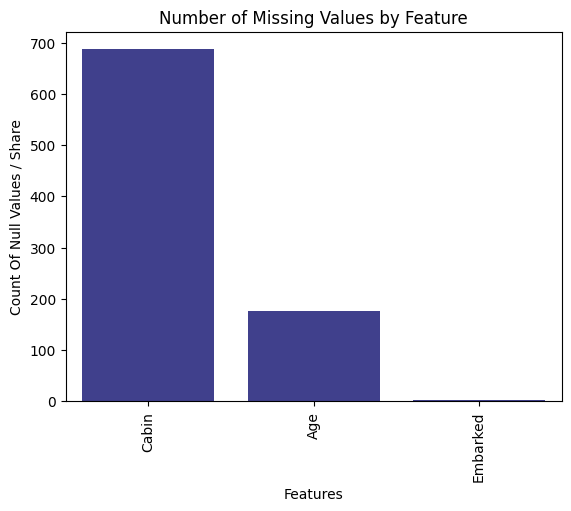

In [10]:
missing_data(df_train)

,Total,Percent
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234


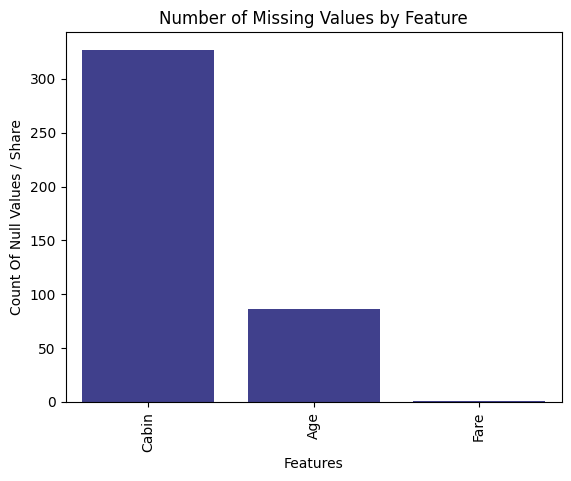

In [11]:
missing_data(df_test)

Text(0.5, 1.0, 'Age Distribution on the Titanic')

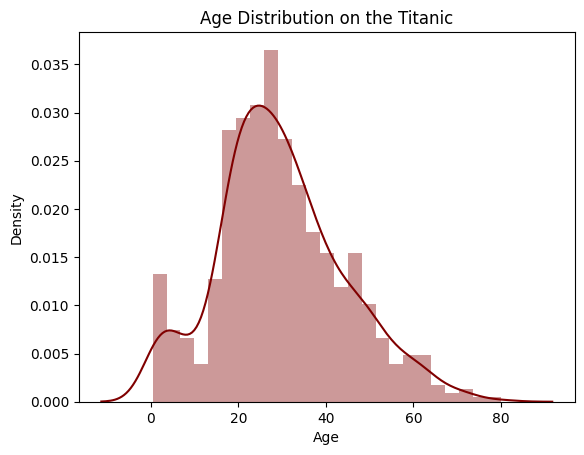

In [12]:
sns.distplot(df_train['Age'],color='maroon',bins=25);
plt.title("Age Distribution on the Titanic")

In [13]:
df_train_mean = df_train.copy()

mean_age = round(df_train_mean['Age'].mean(),0)
print("The Mean age of Passengers is: ",mean_age)


median_age = round(df_train_mean['Age'].mean(),0)
print("The Median age of Passengers is: ", median_age)

The Mean age of Passengers is:  30.0
The Median age of Passengers is:  30.0


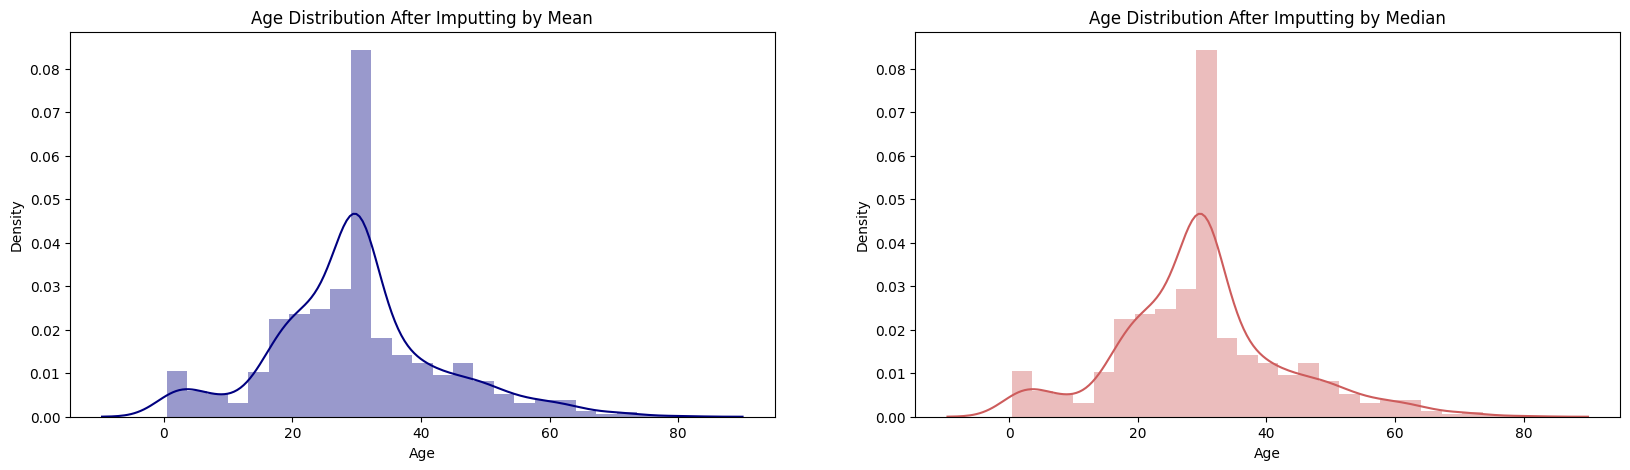

In [14]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.distplot(df_train_mean['Age'].fillna(mean_age),color='navy',bins=25);
plt.title("Age Distribution After Imputting by Mean");

plt.subplot(1,2,2)
sns.distplot(df_train_mean['Age'].fillna(median_age),color='indianRed',bins=25);
plt.title("Age Distribution After Imputting by Median");

There is effectively no differene whether or not we impute the missing Age values with either "Mean" & "Median". 

In [15]:
df_train['Age'] = df_train['Age'].fillna(median_age)
df_test['Age'] = df_test['Age'].fillna(median_age)


df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].mode().iloc[0])
print('-'*100)
df_test.head()

----------------------------------------------------------------------------------------------------


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [16]:
print('-'*100)
df_train.isna().sum()

----------------------------------------------------------------------------------------------------


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:

df_test['Fare'].fillna(df_test['Fare'].dropna().median(), inplace=True)

df_train = df_train.dropna(subset=['Embarked'])
print('-'*70)
print("-------Number of Null Values in the Emabraked col: ",df_train['Embarked'].isnull().sum())

----------------------------------------------------------------------
-------Number of Null Values in the Emabraked col:  0


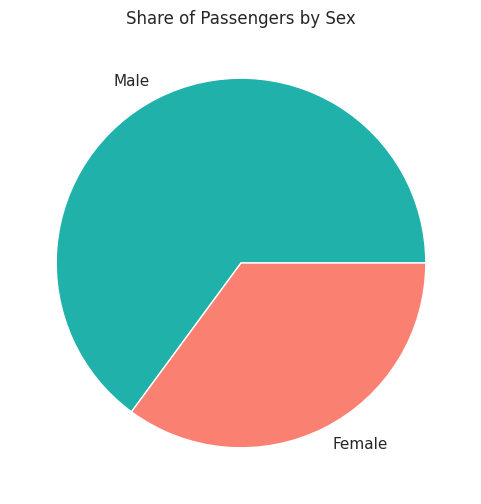

In [18]:
#Let's check the male to female ratio on the Titanic
sns.set(style="whitegrid") 
labels = ['Male','Female']
plt.figure(figsize = (6, 6))
colors = ['lightSeaGreen','salmon']
plt.pie(df_train['Sex'].value_counts(), labels = labels,colors=colors)
plt.title("Share of Passengers by Sex");


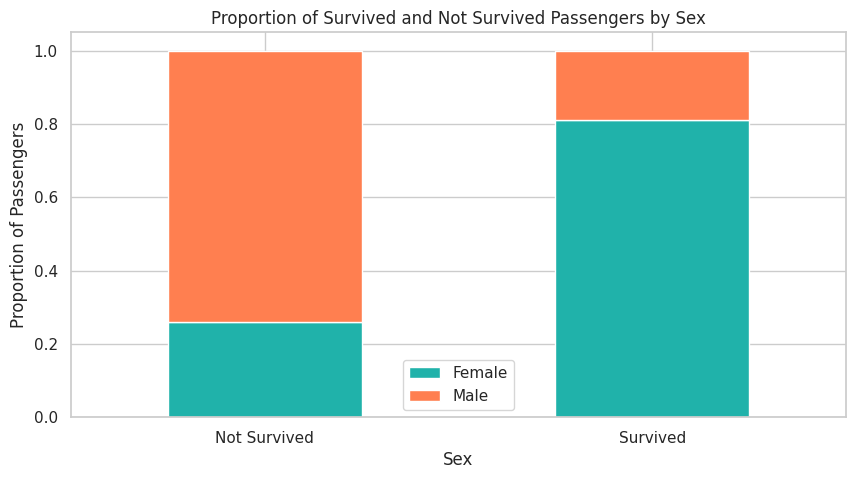

In [19]:
# Let's plot the sex and Survived plot
sex_counts = df_train.groupby('Sex')['Survived'].value_counts(normalize=True).unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(10, 5))
sex_counts.plot(kind='bar', stacked=True, color=['lightSeaGreen', 'coral'], ax=ax)
custom_labels = ['Female', 'Male']
plt.legend(custom_labels)
handles, labels = ax.get_legend_handles_labels() 
plt.ylabel('Proportion of Passengers')
plt.title('Proportion of Survived and Not Survived Passengers by Sex')
plt.xticks([1, 0], ['Survived', 'Not Survived'],rotation=0)
plt.show()

In [20]:
combined_data = [df_train, df_test]
# Create a familysize as a new feature 
for dataset in combined_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [21]:
# Create a bin for the age of the all names
for dataset in combined_data:
    dataset['Age_Bin'] = pd.cut(dataset['Age'],bins=[0,12,20,40,120], labels=['Child','Teenager','Adult','Elder'])

In [22]:
# Create a Fare bin as a feature
for dataset in combined_data:
    dataset['Fare_Bin'] = pd.cut(dataset['Fare'],bins=[0.0,7.91,14.45,31,120,550], labels=['Low_Fare','Median_Fare','Average_Fare','High_Fare','Upper_Class_Fare'],include_lowest=True)

In [23]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
FamilySize       0
Age_Bin          0
Fare_Bin         0
dtype: int64

In [24]:
df_train['Fare_Bin'].value_counts()

Fare_Bin
Average_Fare        229
Low_Fare            223
Median_Fare         217
High_Fare           182
Upper_Class_Fare     38
Name: count, dtype: int64

In [25]:
df_train[df_train['Fare_Bin'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_Bin,Fare_Bin


In [26]:
df_train = df_train
df_test = df_test

In [27]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_Bin,Fare_Bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Adult,Low_Fare
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Adult,High_Fare
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Adult,Median_Fare
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Adult,High_Fare
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Adult,Median_Fare


In [28]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_Bin,Fare_Bin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,Adult,Low_Fare
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,Elder,Low_Fare
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,Elder,Median_Fare
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,Adult,Median_Fare
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3,Adult,Median_Fare


In [29]:
all_dat = [df_train, df_test]
drop_columns = ['Age','Fare','Name','Cabin','Ticket','PassengerId']

for dataset in all_dat:
    for column in drop_columns:
        if column in dataset.columns:
            dataset.drop(column, axis=1, inplace=True)

In [30]:
df_train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,FamilySize,Age_Bin,Fare_Bin
0,0,3,male,1,0,S,2,Adult,Low_Fare
1,1,1,female,1,0,C,2,Adult,High_Fare
2,1,3,female,0,0,S,1,Adult,Median_Fare
3,1,1,female,1,0,S,2,Adult,High_Fare
4,0,3,male,0,0,S,1,Adult,Median_Fare


In [31]:
df_train = pd.get_dummies(df_train, columns = ['Sex','Embarked','Age_Bin','Fare_Bin'],dtype=int,prefix=['Sex','Title','Age_Bin','Fare_Bin'])

In [32]:
df_test = pd.get_dummies(df_test, columns = ['Sex','Embarked','Age_Bin','Fare_Bin'],dtype=int,prefix=['Sex','Title','Age_Bin','Fare_Bin'])

<Axes: >

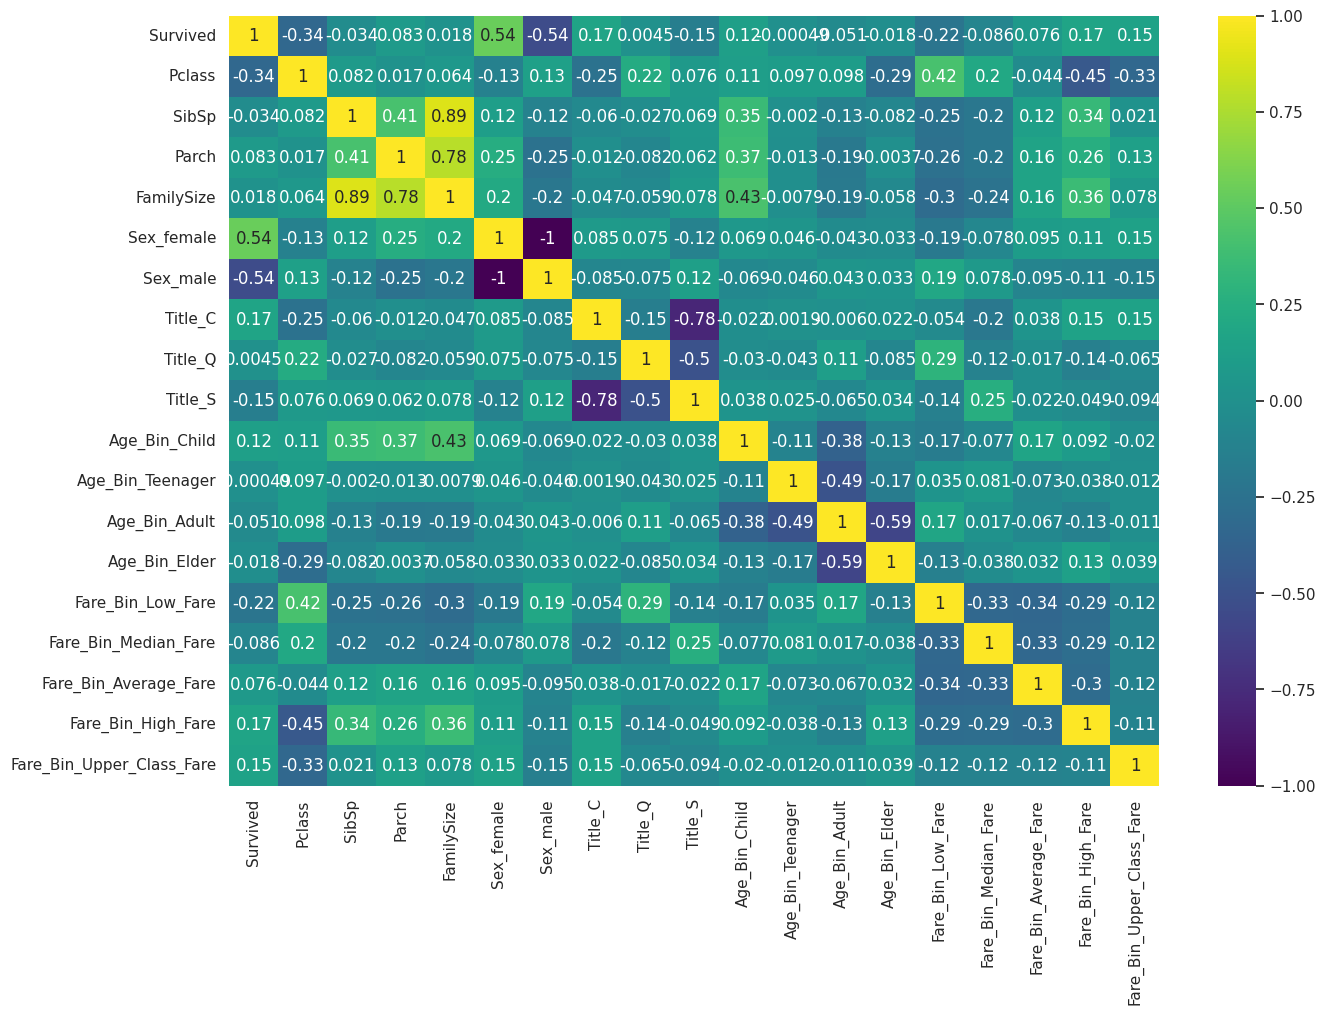

In [33]:
corr = df_train.corr()
plt.figure(figsize=(15,10))
sns.heatmap(data=corr,annot=True,cmap='viridis')

In [34]:
from sklearn.model_selection import train_test_split # Inorder to split the data
from sklearn.ensemble import RandomForestClassifier # For our prediction
from sklearn.metrics import accuracy_score #Accuracy Scoring
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import cross_val_score #Score Evaluation
from sklearn.model_selection import cross_val_predict #Predction Scoring
from sklearn.model_selection import KFold

In [35]:
df_train.head()

,Survived,Pclass,SibSp,Parch,FamilySize,Sex_female,Sex_male,Title_C,Title_Q,Title_S,Age_Bin_Child,Age_Bin_Teenager,Age_Bin_Adult,Age_Bin_Elder,Fare_Bin_Low_Fare,Fare_Bin_Median_Fare,Fare_Bin_Average_Fare,Fare_Bin_High_Fare,Fare_Bin_Upper_Class_Fare
0,0,3,1,0,2,0,1,0,0,1,0,0,1,0,1,0,0,0,0
1,1,1,1,0,2,1,0,1,0,0,0,0,1,0,0,0,0,1,0
2,1,3,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0
3,1,1,1,0,2,1,0,0,0,1,0,0,1,0,0,0,0,1,0
4,0,3,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0


In [36]:
feat_train = df_train.drop('Survived',axis=1)
target_train = df_train['Survived']

test_X  = df_test.copy()
#test_X  = df_test.drop("PassengerId", axis=1).copy()
#X_test  = test_df.drop("PassengerId", axis=1).copy()

X_train, X_test, y_train, y_test = train_test_split(feat_train, target_train,test_size=0.2,random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((711, 18), (178, 18), (711,), (178,))

In [37]:
# Let's create a class for our model
model = RandomForestClassifier(n_estimators=300, criterion="gini",random_state=42)

# Let's now fit our model 
model.fit(X_train,y_train)

#model.fit(X_train,y_train)

model.score(X_test,y_test)

0.7752808988764045

In [38]:
predictions = model.predict(X_test)

#Let's now check the Accuracy of our model
round(accuracy_score(predictions,y_test)*100,2)

77.53

In [39]:
kfold = KFold(n_splits=10)
result = cross_val_score(model,feat_train,target_train,cv=10,scoring='accuracy')
print(round(result.mean()*100,2))

82.23


In [40]:
for i in range(2,20):
    print(i)
    y_pred = cross_val_predict(model,feat_train,target_train,cv=i)
    print('--------------The Accuracy of the model----------------------------')
    print('The accuracy of the RFC is',round(accuracy_score(y_pred,target_train)*100,2))

2
--------------The Accuracy of the model----------------------------
The accuracy of the RFC is 79.75
3
--------------The Accuracy of the model----------------------------
The accuracy of the RFC is 79.87
4
--------------The Accuracy of the model----------------------------
The accuracy of the RFC is 80.31
5
--------------The Accuracy of the model----------------------------
The accuracy of the RFC is 81.55
6
--------------The Accuracy of the model----------------------------
The accuracy of the RFC is 82.11
7
--------------The Accuracy of the model----------------------------
The accuracy of the RFC is 81.89
8
--------------The Accuracy of the model----------------------------
The accuracy of the RFC is 82.45
9
--------------The Accuracy of the model----------------------------
The accuracy of the RFC is 82.23
10
--------------The Accuracy of the model----------------------------
The accuracy of the RFC is 82.23
11
--------------The Accuracy of the model----------------------------
T

In [41]:
from sklearn.model_selection import GridSearchCV

# Let's create a new class to hold another model 
modell = RandomForestClassifier()
n_estim = range(100,1000,100)
param_grid = {"n_estimators": [300]}
#Let's create a function where it croos validates with different n_estimators
modell_rfc = GridSearchCV(modell, param_grid=param_grid, cv=17,scoring="accuracy",n_jobs=4,verbose=1)

modell_rfc.fit(X_train,y_train)

#Let's chech what the best score is as well as it's estimator
print(modell_rfc.best_score_)
modell_rfc.best_estimator_

Fitting 17 folds for each of 1 candidates, totalling 17 fits
0.8340848534535764


RandomForestClassifier(n_estimators=300)

In [42]:
#modell = RandomForestClassifier()
#random_forest_classifier = RandomForestClassifier(n_estimators=300, random_state=42)


random_forest_classifier.fit(X_train,y_train)

random_forest_classifier.score(X_test,y_test)

NameError: name 'random_forest_classifier' is not defined

In [ ]:
test_X

In [ ]:
#test_X  = df_test.drop("PassengerId", axis=1).copy()
predictions_final = random_forest_classifier.predict(test_X)

In [ ]:
submission_df = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": predictions_final})

In [ ]:
submission_df.to_csv('test1.csv')